In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

import inspect
import re

def prinfo(*args, **kwargs):
    frame = inspect.currentframe().f_back

    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)

    if 'newline' in kwargs:
        r = r[:-14]

    vnames = r.split(", ") if len(args) > 1 else [r] 

    # print(r)
    # print()


    if 'newline' in kwargs:
        newlinestring = "\n" if kwargs['newline'] else ""
    else:
        newlinestring = ""


    for i, (var,val) in enumerate(zip(vnames, args)):
        print(f"{var} = {newlinestring}{val}\n")


### Nodes

In [2]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

H = nx.path_graph(10)

G.add_nodes_from(H)
G.add_node(H)

prinfo(H)
prinfo(G)

H = Graph with 10 nodes and 9 edges

G = Graph with 11 nodes and 0 edges



### Edges

In [3]:
G.add_edge(1, 2)

e = (2, 3)

G.add_edge(*e)  # unpack edge tuple*

G.add_edges_from([(1, 2), (1, 3)])

G.add_edges_from(H.edges)

prinfo(G)

G = Graph with 11 nodes and 10 edges



In [4]:

G.clear()

G.add_edges_from([(1, 2), (1, 3)])

G.add_node(1)

G.add_edge(1, 2)

G.add_node("spam")        # adds node "spam"

G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'

G.add_edge(3, 'm')


prinfo(G)

G = Graph with 8 nodes and 3 edges



In [5]:
DG = nx.DiGraph()

DG.add_edge(2, 1)   # adds the nodes in order 2, 1

DG.add_edge(1, 3)

DG.add_edge(2, 4)

DG.add_edge(1, 2)

assert list(DG.successors(2)) == [1, 4]

assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

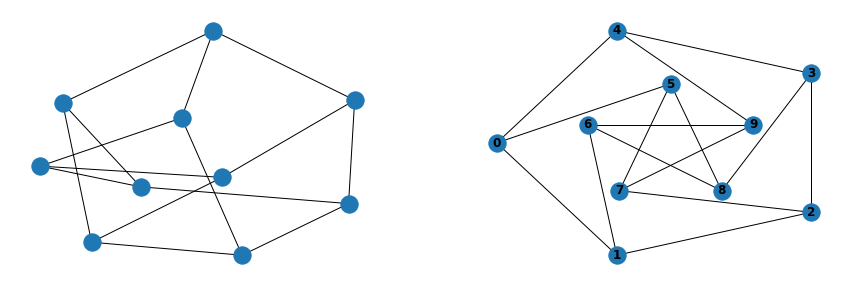

In [6]:
G = nx.petersen_graph()

subax1 = plt.subplot(121)

nx.draw(G, with_labels=False, font_weight='bold')

subax2 = plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

[1, 4.7, 1, 3, 1, 2, 1, 7, 1]

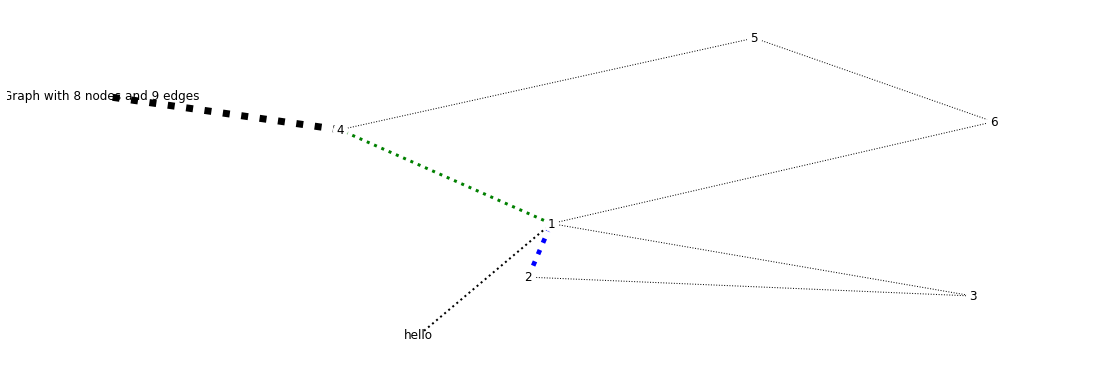

In [7]:
G = nx.Graph()
G.add_edges_from([
    (2, 3, {"weight": 1, 'color': 'black'}),
    (3, 1, {"weight": 1, 'color': 'black'}),
    (1, 4, {"weight": 3, 'color': 'green'}),
    (4, 5, {"weight": 1, 'color': 'black'}),
    (5, 6, {"weight": 1, 'color': 'black'}),
    (6, 1, {"weight": 1, 'color': 'black'}),
    (1, 2, {"weight": 4.7, 'color': 'blue'},)
    ])

G.add_node("hello")
G.add_edge(1, "hello", weight=2, color='black')


G.add_node(G)
G.add_edge(4, G, weight=7, color='black')

edges = G.edges()
weights = nx.get_edge_attributes(G,'weight').values()
colors = nx.get_edge_attributes(G,'color').values()


options = {
    'node_color': 'white',
    'node_size': 200,
    'style': 'dotted'
    }

nx.draw(G, width=list(weights), edge_color=list(colors), with_labels=True, **options)

list(weights)
